** Skeleton of Assignment 4:**
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [8]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
np.random.seed(100)
%pylab inline

import os
import sys
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
import datetime as dt

#set this to true while deeloping to subsample data
DEVELOPING = False

#chose day hours vs night hours:
DAYTIME = (6, 18)

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os

os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mb6203/PUIDATA


In [10]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

** Statistical significance threshold throughout: $\alpha = 0.05$ **

In [11]:
alpha = 0.05

# Read in data
I am reading in data from January and June 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [15]:
# download data: a dataset from January 
datestring01 = '201501'
getCitiBikeCSV(datestring01)
datestring06 = '201506'
getCitiBikeCSV(datestring06)

file in place, you can continue
file in place, you can continue


In [16]:
# read in data Jan
my_df_jan = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring01 + '-citibike-tripdata.csv')
my_df_jan.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [17]:
#read in data Jun
my_df_jun = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring06 + '-citibike-tripdata.csv')
my_df_jun.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [18]:
#subsample data while developing code 
#THIS IS IMPORTANT! the computing speed when using the full sample is orohibitively slow
#for a good workflow it was necessary to develope on a subsample, then run the whole notebook on the full dataset

if DEVELOPING:
    cb2015 = my_df_jan[::1000]
else:
    cb2015 = pd.concat([my_df_jan, my_df_jun])

In [19]:
print ("Shape of CB DF")
cb2015.shape

Shape of CB DF


(1226771, 15)

In [30]:
df = cb2015

In [31]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [32]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

## SPLIT BY CATEGORY

splitting data by day vs night and looking at trip duration:

**H0: there is no statistical difference in the trip duration distribution during the day and the night**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [35]:
#extract hour when trip started
df['starthour'] = pd.to_numeric(cb2015.starttime.apply(lambda x: 
                                                           x.split()[1].split(':')[0]))

In [36]:
#check start hour
df.starthour.values[0]

0

In [37]:
# split day and night smaples
# chose trip starting between 6 and 18 as day trips
df['dayride'] = (df.starthour.values > DAYTIME[0]) & (df.starthour.values < DAYTIME[1])

In [38]:
#collecting latitude and longitude for later splitting borroughs
latlon = (cb2015[['start station latitude', 
                'start station longitude']].values.astype(float))
print("The number of rows in the 2015 citibike dataset is", len(latlon))
#dropping not needed columns to lighten memory load
df = df.drop(df.columns[5:-1], axis=1).drop(df.columns[1:3], axis=1)
df.head()

The number of rows in the 2015 citibike dataset is 1226771


,tripduration,start station id,start station name,dayride
0,1346,455,1 Ave & E 44 St,False
1,363,434,9 Ave & W 18 St,False
2,346,491,E 24 St & Park Ave S,False
3,182,384,Fulton St & Waverly Ave,False
4,969,474,5 Ave & E 29 St,False


In [39]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id
count,1.226771e+06,1.226771e+06
mean,8.463465e+02,4.561577e+02
std,3.052017e+03,3.730900e+02
min,6.000000e+01,7.200000e+01
25%,3.810000e+02,3.070000e+02
50%,6.050000e+02,4.170000e+02
75%,9.920000e+02,4.920000e+02
max,1.691873e+06,3.002000e+03


# exploratory analysis

In [40]:
print ("Number of daytime rides", df.dayride.sum())
print ("Number of nighttime rides", (~df.dayride).sum())

Number of daytime rides 819517
Number of nighttime rides 407254


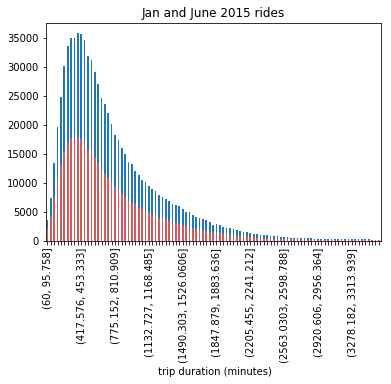

In [41]:
# plot daytime trip duration histogram in 100 bins
# plot 0% to 95% percentile because I expect these distribution to be long tailed and I see 43,000 hour trips above
pc = np.percentile(cb2015.tripduration, [0, 99])
bins = np.linspace(int(pc[0]), int(pc[1] / 100) * 100, 100)
dayax = df[df.dayride].tripduration.groupby(
    pd.cut(df[df.dayride].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False)
dayax.set_title("Jan and June 2015 rides")
# plot nighttime trip duration histogram
df[~df.dayride].tripduration.groupby(
    pd.cut(df[~df.dayride].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False, ax=dayax, 
                                             color='IndianRed')
xlab = dayax.get_xticklabels()
dayax.set_xticklabels(['' if float(i)%10 > 0 else xlab[i] for i in range(len(xlab))]);
dayax.set_xlabel(" trip duration (minutes)");



In [42]:
print ("Figure 1: histogrammed distribution of ride duration by day (blue) and night (red).\n" +
       "The distributions are plotted up to the 95th percentile (removing outliers in the tail).\n" +
       "The distributions look similar, such that visual inspection is not sufficient " +
       "to determine if there is a difference." + 
       "The number of rides is obviously higher during day hours.\n" +
       "Note, that our definition of day includes %d hours between hour %d and %d"%(DAYTIME[1] - DAYTIME[0],
                                                                                    DAYTIME[0], DAYTIME[1]))

Figure 1: histogrammed distribution of ride duration by day (blue) and night (red).
The distributions are plotted up to the 95th percentile (removing outliers in the tail).
The distributions look similar, such that visual inspection is not sufficient to determine if there is a difference.The number of rides is obviously higher during day hours.
Note, that our definition of day includes 12 hours between hour 6 and 18


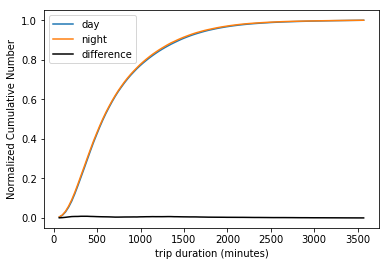

In [43]:
#print df.ageS, df.ageS.cumsum()

csD = df[df.dayride].tripduration.groupby(pd.cut(df[df.dayride].tripduration, 
                                                 bins)).agg([count_nonzero]).cumsum()

csN = df[~df.dayride].tripduration.groupby(pd.cut(df[~df.dayride].tripduration, 
                                                  bins)).agg([count_nonzero]).cumsum()

#print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "night")
pl.plot(bins[:-1] + 5, np.abs(csN / csN.max() - csD / csD.max()), 'k-',
        label = "difference")
pl.xlabel("trip duration (minutes)")
pl.ylabel("Normalized Cumulative Number")
pl.legend();

** Figure 2: the cumulative distribution of CitiBike riders' ages by day vs night trips.** 

The cumulative distribution is, by eye, practically identical with the maximum difference in heights between the cumulative distributions reached near 100 minutes of travel time. The difference is much less than 10%.

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

Null: the two distribution come from the same parent distribution

In [44]:
ks = scipy.stats.ks_2samp(df[df.dayride].tripduration, df[~df.dayride].tripduration)
print (ks)
if ks[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution is rejected (p<0.05)")
    

Ks_2sampResult(statistic=0.010931405251323301, pvalue=1.1233645097381771e-28)
The Null hypothesis that the two samples are generated by the same parent distribution is rejected (p<0.05)


** Note on the KS test: the KS test, and generally any test of Null Hypothesis Statistical Testing, has higher power for larger samples. With a million observations, 100s of thousands in each sample tiny differences tend to become statistically significant. ** (The distribution looked different by eye in a cumulative plot in the testig phase, with 1000 fewer samples but the p-value was less significant)

** Now retest using a test for correlation. **

The null hypothesis is that the two samples are generated from the same distribution. 

The alternative hypothesis is that the two samples are generated by unrelated distributions.

Note that this is not a rigorous test, unlike the KS test, and according to scipy.stats.pearsonr _"The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so."_


In [45]:
#more rides during the day than during the night: subsample day rides
dfduringday = df[df.dayride].iloc[np.random.choice(range(len(df[df.dayride])), (~df.dayride).sum(), 
                                      replace=False)]

In [46]:
parsons = scipy.stats.pearsonr(np.sort(dfduringday.tripduration), np.sort(df[~df.dayride].tripduration))
print ("Parson's test result", parsons)
if parsons[1] >= alpha: 
    print (r"The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "is rejected (p = %.3f<0.05)"%parsons[1])
 

Parson's test result (0.96604299315114617, 0.0)
The Null hypothesis that the two samples are generated from uncorrelated distributions. is rejected (p = 0.000<0.05)


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [47]:
spearmanr = scipy.stats.spearmanr(np.sort(dfduringday.tripduration), np.sort(df[~df.dayride].tripduration))
print ("Spearman's r test result", spearmanr)
if spearmanr[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "is rejected (p = %.3f<0.05)"%spearmanr[1])
 

Spearman's r test result SpearmanrResult(correlation=0.99999937041244336, pvalue=0.0)
The Null hypothesis that the two samples are generated from uncorrelated distributions. is rejected (p = 0.000<0.05)


** This test is often used to assess if sample are generated by the same distribution but in fact it tests if the samples are generated by _correlated_ distributions. As a test to assess independence it is not powerful, as even a small amount of correlation would raise the p-value**